In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
Data_corr = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSet.csv')
Data_no_corr = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSet_no_thres.csv')

In [3]:
Data_corr.head()

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
0,14440,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
1,22593,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
2,21901,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
3,17351,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
4,1136,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False


In [5]:
Data_no_corr.head()

,ImageDir,Label,MaskDir
0,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
1,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
2,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
3,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
4,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN


# Check the before and after count of labels

In [6]:
Data_corr.groupby('Label').count().sum()

ImageDir    34930
MaskDir       310
dtype: int64

In [7]:
Data_no_corr.groupby('Label').count().sum()

ImageDir    37166
MaskDir      2052
dtype: int64

In [8]:
dat_no_corr_count = Data_no_corr.groupby('Label').count().loc[['Crack A','Crack B','Crack C','Finger Failure']]
dat_no_corr_count.reset_index(inplace=True)

dat_corr_count = Data_corr.groupby('Label').count().loc[['CrackA','CrackB','CrackC','FingerFailure']]
dat_corr_count.reset_index(inplace=True)

# merge them and create a new variable indicating the dataset
dat_corr_count['Dataset'] = 'Before'
dat_no_corr_count['Dataset'] = 'After'

#Rename the labels of Data_corr such that CrackA = Crack A
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackA', 'Crack A')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackB', 'Crack B')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackC', 'Crack C')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('FingerFailure', 'Finger Failure')

#merge the two datasets
dat_count = pd.concat([dat_corr_count, dat_no_corr_count], axis=0)

KeyError: "None of [Index(['CrackA', 'CrackB', 'CrackC', 'FingerFailure'], dtype='object', name='Label')] are in the [index]"

In [49]:
dat_count

,Label,ImageDir,MaskDir,Dataset
0,Crack A,315,315,Before
1,Crack B,447,447,Before
2,Crack C,237,237,Before
3,Finger Failure,965,965,Before
0,Crack A,335,335,After
1,Crack B,470,470,After
2,Crack C,247,247,After
3,Finger Failure,1000,1000,After


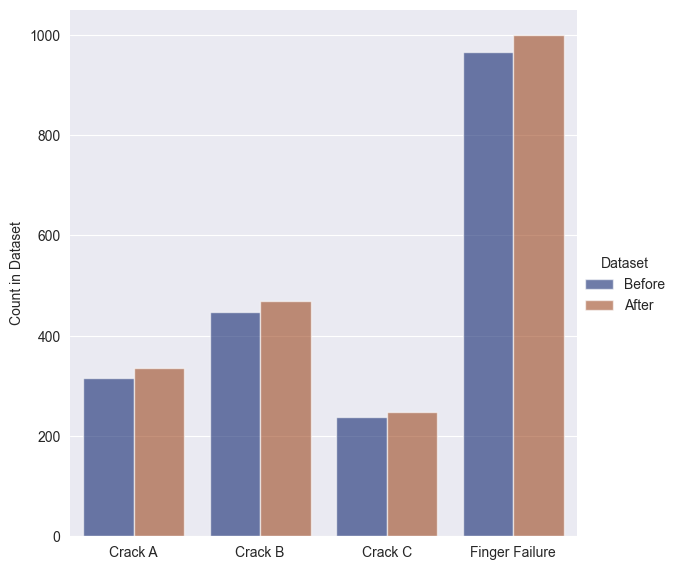

In [54]:
# Plot histogram of the data before and after with overlay
g = sns.catplot(
    data=dat_count,
    kind="bar",
    x="Label",
    y="ImageDir",
    hue="Dataset",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
)

g.despine(left=True)
g.set_axis_labels("", "Count in Dataset")
#g.legend.set_title("Before and after correction")